# 插值与拟合


In [2]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

In [119]:
x = np.linspace(0, 10, 64)

C:\Users\29236\AppData\Local\Temp\ipykernel_21500\3419631680.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)+np.array([np.random.random()*1.2 for i in range(len)])


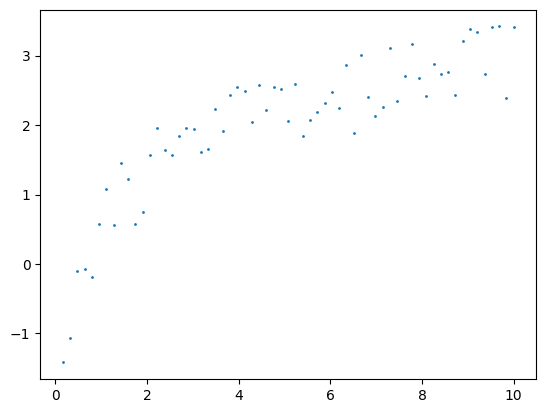

In [122]:
y = getY(x, 64)
plt.scatter(x, y, s=1)

In [113]:
def getY(x, len):
    return np.log(x) + np.array([np.random.random() * 1.2 for i in range(len)])

`scipy.interp1d()`仅仅支持在训练样本定义域范围内进行插值，也就是说不具备预测的能力

In [134]:
f = interp1d(x, y, kind='zero')
xx = np.linspace(0, 10, 1024)

C:\Users\29236\AppData\Local\Temp\ipykernel_21500\3419631680.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)+np.array([np.random.random()*1.2 for i in range(len)])


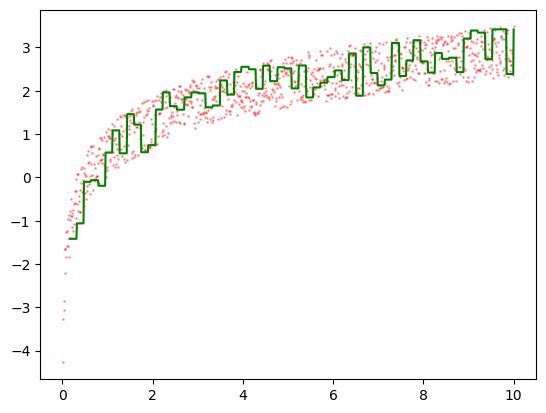

In [135]:
plt.scatter(xx, getY(xx, 1024), s=1, c='r', alpha=0.3)
plt.plot(xx, f(xx), c='g')

In [139]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(copy_X=False)
y[1:]

array([-1.41726556, -1.06090926, -0.10128992, -0.06467448, -0.19356145,
        0.5739487 ,  1.08562873,  0.55562731,  1.46019307,  1.21776907,
        0.58118672,  0.7451415 ,  1.56606141,  1.96359403,  1.64514197,
        1.56322596,  1.84819137,  1.96233399,  1.94178942,  1.619203  ,
        1.6611177 ,  2.23832597,  1.91206628,  2.43531616,  2.55383052,
        2.4972715 ,  2.04591697,  2.58015259,  2.22200752,  2.54353317,
        2.51744553,  2.05438745,  2.58461231,  1.84620115,  2.07652388,
        2.18678823,  2.31537484,  2.47015776,  2.24728846,  2.86097606,
        1.88620759,  3.00212787,  2.4108062 ,  2.12445248,  2.25780997,
        3.10523253,  2.34184937,  2.70044485,  3.16824293,  2.67921462,
        2.42052051,  2.87277579,  2.73648487,  2.76304067,  2.43054676,
        3.20489153,  3.39061181,  3.34253705,  2.73019425,  3.41858251,
        3.41983115,  2.38563814,  3.41550341])

In [140]:
model.fit(x[1:].reshape((-1, 1)), y[1:])

LinearRegression(copy_X=False)

In [141]:
yy = model.predict(xx.reshape((-1, 1)))

In [144]:
y_actual = getY(xx, 1024)

C:\Users\29236\AppData\Local\Temp\ipykernel_21500\3419631680.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)+np.array([np.random.random()*1.2 for i in range(len)])


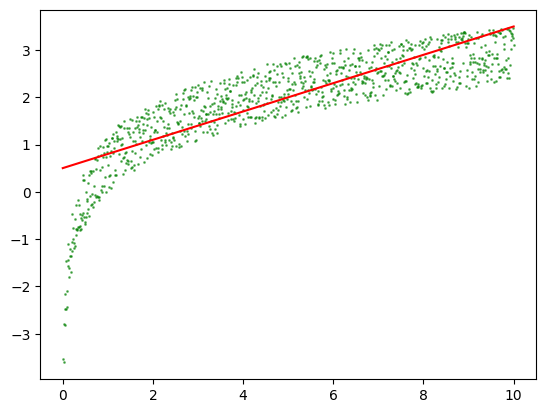

In [145]:
plt.scatter(xx, y_actual, s=1, c='g', alpha=0.54)
plt.plot(xx, yy, c='r')

In [37]:
model.score(x.reshape((-1, 1)), y)

-0.021182454378331883

In [150]:
x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5
# plt.scatter(x,y,s=1)
y.shape[-1]

100

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
# from numpy import ployfit, poly1d

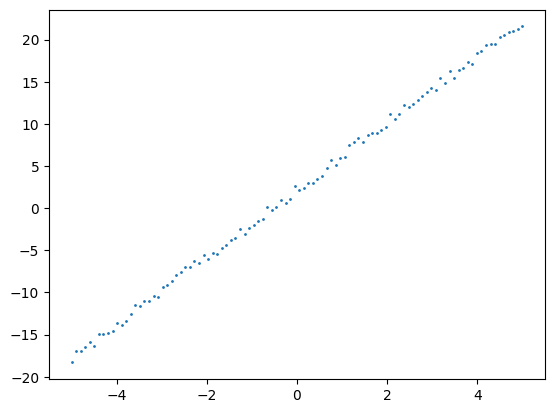

In [8]:
x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5 + np.random.rand(x.shape[-1]) * 1.4
plt.scatter(x, y,s=1)

`numpy.plotfit()`:最小平方多项式拟合

In [9]:
func = np.polyfit(x,y,deg=1)
func

array([3.98371928, 2.15319024])

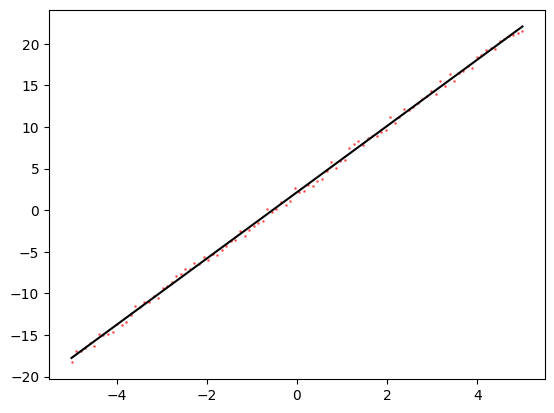

In [13]:
plt.scatter(x,y,s=1,c='r',alpha=0.5)
plt.plot(x,func[0]*x+func[-1],c='k')

`poly1d()`:传入系数，返回方程。参数`r=True`时，系数代表方程的根

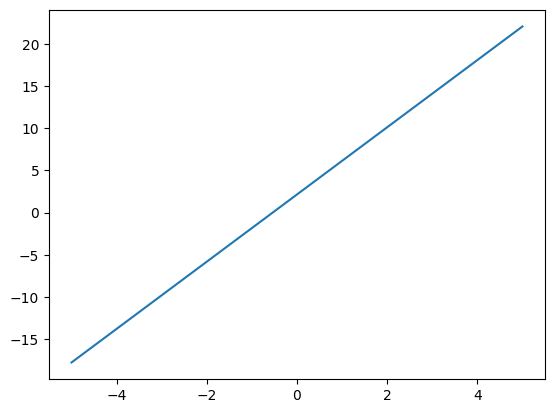

In [15]:
f = np.poly1d(func)
plt.plot(x,f(x))

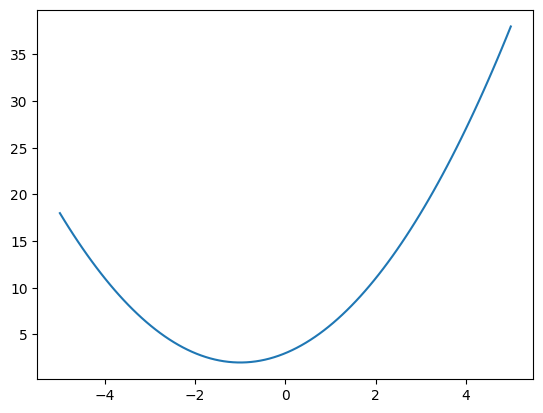

In [18]:
f = np.poly1d([1,2,3])
plt.plot(x,f(x))